In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sb
from pandas_profiling import ProfileReport
from sklearn.cluster import KMeans
 
%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')
 
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.feature_selection import SelectKBest

In [96]:
dataset = pd.read_csv('ExamenFinal.csv')
dataset

,id,FECHA_NACIMIENTO,Edad,GENERO,ESTADO_CIVIL,NUMERO_HIJOS,PROFESION,NIVEL_ESTUDIO,OCUPACION,SERVICIO,...,Mean(Uso Zona (Min)),Mean(Fuera Zona (Min)),Mean(Colision),MARCA,CLASE,TIPO,MODELO,SINIESTROS_2016,SINIESTROS_2017,SINIESTROS_2018
0,43665400,12/07/1939,72.38,Masculino,Casado,4,Medico,Universitario,MEDICINA Y AFINES,Particular,...,21.20,0.00,0.00,MERCEDES BENZ,AUTOMOVIL,230 E,1987,0,0,0
1,60342217,16/12/1975,35.93,Masculino,Casado,0,Servicios de Informatica,Tecnico-tecnologico,OTRAS INGENIERIAS,Particular,...,0.00,28.09,0.00,RENAULT,AUTOMOVIL,R9,1992,0,0,0
2,16205257,16/11/1930,81.04,Femenino,Casado,3,Odontologo,Universitario,MEDICINA Y AFINES,Particular,...,7.66,13.36,0.00,MERCEDES BENZ,AUTOMOVIL,C 240,1998,0,0,0
3,42188664,5/06/1973,38.46,Femenino,Viudo,0,Modista y Sastre,Bachillerato,AMA DE CASA,Publico,...,21.31,1.34,0.01,CHEVROLET,AUTOMOVIL,CORSA,2003,0,0,0
4,93966068,10/08/1941,70.30,Masculino,Casado,0,Contador Publico,Universitario,FINANCIERO-CONTABLE-ECONOMICO-BANCARIO-ADMINIS...,Particular,...,7.47,15.15,0.00,MAZDA,AUTOMOVIL,626,2003,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
597,86038652,22/10/1955,56.09,Femenino,Casado,2,Medico,Universitario,INDEPENDIENTE,Particular,...,19.59,2.97,0.01,RENAULT,AUTOMOVIL,TWINGO,2006,0,1,0
598,80355353,21/06/1963,48.42,Femenino,Soltero,0,Medico,Universitario,MEDICINA Y AFINES,Particular,...,14.31,3.59,0.00,MAZDA,AUTOMOVIL,ALLEGRO,1999,0,0,1
599,43184833,17/10/1965,46.10,Femenino,Soltero,1,Profesor,Universitario,EDUCADOR,Particular,...,22.91,0.13,0.00,MAZDA,AUTOMOVIL,323,2002,0,0,0
600,80786094,9/07/1958,53.38,Femenino,Viudo,4,Fisioterapeuta,Bachillerato,AMA DE CASA,Particular,...,0.05,11.92,0.01,RENAULT,AUTOMOVIL,SYMBOL,2007,0,1,0


In [97]:
dataset = dataset.drop(['id','FECHA_NACIMIENTO','PROFESION','OCUPACION','KILOMETRAJE_INSTALACION','FECHA_LICENCIA','RELACION_ASEGURADO','COLOR','CIUDAD','TIPO','CIUDAD','RELACION_ASEGURADO'], axis=1)
dataset.describe()

,Edad,NUMERO_HIJOS,TIEMPO_PROPIETARIO,Edad Licencia,CILINDRAJE,Min(Recorrido (Km)),Min(Frenadas (Uni)),Min(Arrancadas (Uni)),Min(Aceleraciones (Uni)),Min(Exceso Velocidad (Min)),...,Mean(Exceso Velocidad (Min)),Mean(Maxima Velocidad (Km/h)),Mean(Tiempo Uso (Min)),Mean(Uso Zona (Min)),Mean(Fuera Zona (Min)),Mean(Colision),MODELO,SINIESTROS_2016,SINIESTROS_2017,SINIESTROS_2018
count,602.000000,602.000000,602.000000,602.000000,602.000000,602.000000,602.000000,602.000000,602.0,602.000000,...,602.000000,602.000000,602.000000,602.000000,602.00000,602.000000,602.000000,602.000000,602.000000,602.000000
mean,46.396213,1.325581,2.661130,12.725947,2008.948505,0.652824,0.003322,0.001661,0.0,0.001661,...,0.283023,6.722708,22.544286,13.096462,9.44804,0.005382,2004.536545,0.112957,0.126246,0.069767
std,14.151405,1.349299,2.694936,13.165610,671.955404,0.687952,0.081514,0.040757,0.0,0.040757,...,0.560802,9.121756,5.303149,8.273964,9.93227,0.031161,4.226077,0.351652,0.356553,0.273845
min,2.050000,0.000000,0.000000,0.080000,1000.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,7.000000,0.000000,0.00000,0.000000,1981.000000,0.000000,0.000000,0.000000
25%,35.320000,0.000000,1.000000,2.292500,1400.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.020000,1.010000,19.650000,5.155000,1.72000,0.000000,2003.000000,0.000000,0.000000,0.000000
50%,46.280000,1.000000,2.000000,7.570000,2000.000000,1.000000,0.000000,0.000000,0.0,0.000000,...,0.090000,3.700000,21.915000,15.750000,5.33000,0.000000,2006.000000,0.000000,0.000000,0.000000
75%,55.182500,2.000000,3.000000,20.155000,2500.000000,1.000000,0.000000,0.000000,0.0,0.000000,...,0.310000,8.667500,24.745000,18.917500,16.53500,0.000000,2008.000000,0.000000,0.000000,0.000000
max,87.670000,8.000000,19.000000,75.920000,5400.000000,12.000000,2.000000,1.000000,0.0,1.000000,...,6.840000,94.350000,59.460000,53.050000,59.46000,0.550000,2011.000000,2.000000,2.000000,2.000000


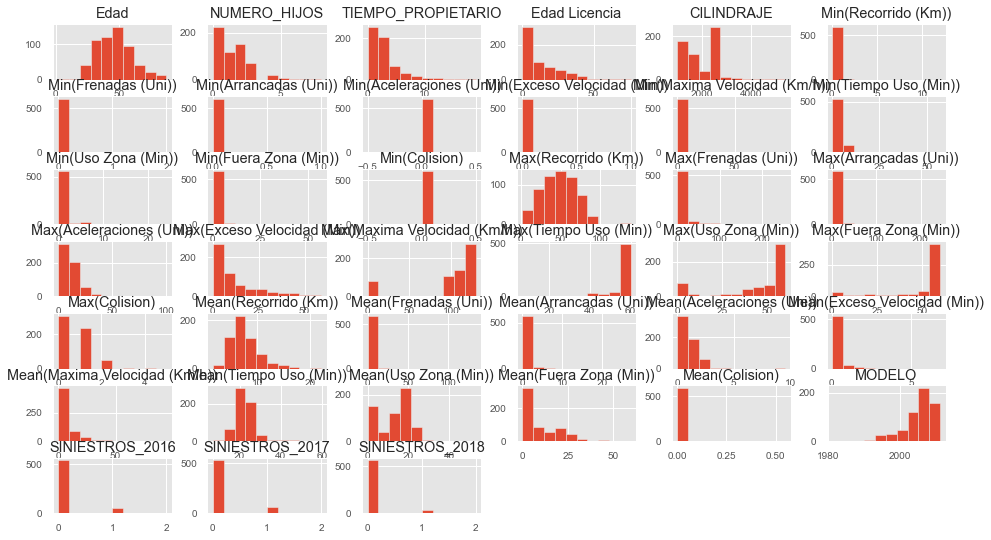

In [98]:
dataset.hist()
plt.show()

In [99]:
print(dataset.groupby('GENERO').size())

GENERO
Femenino     260
Masculino    342
dtype: int64


In [100]:
print(dataset.groupby('ESTADO_CIVIL').size())

ESTADO_CIVIL
Casado      327
Separado     34
Soltero     193
Union        29
Viudo        19
dtype: int64


In [101]:
print(dataset.groupby('PROFESION').size())

KeyError: 'PROFESION'

In [102]:
print(dataset.groupby('SERVICIO').size())

SERVICIO
Particular    592
Publico        10
dtype: int64


In [103]:
print(dataset.groupby('MARCA').size())

MARCA
AUDI               4
BMW                1
CHEVROLET        235
CITROEN            1
DAEWOO             4
DAIHATSU           4
FORD               8
HONDA              3
HYUNDAI            7
JEEP               2
KIA               16
MAZDA             50
MERCEDES BENZ     15
MITSUBISHI        12
NISSAN            27
PEUGEOT            8
RENAULT          178
SKODA              1
SSANGYONG          1
SUBARU             4
SUZUKI             1
TOYOTA            10
VOLKSWAGEN        10
dtype: int64


In [104]:
print(dataset.groupby('CLASE').size())

CLASE
AUTOMOVIL           533
CAMIONETA PASAJ.      9
CAMPERO              53
FURGON                1
PICKUP DOBLE CAB      6
dtype: int64


In [105]:
print(dataset.groupby('NIVEL_ESTUDIO').size())

NIVEL_ESTUDIO
Bachillerato                                    57
Posgrado-Especializacion-Maestria-Doctorado    156
Primaria                                         9
Tecnico-tecnologico                             47
Universitario                                  333
dtype: int64


In [106]:
print(dataset.groupby('OCUPACION').size())

KeyError: 'OCUPACION'

In [107]:
dataset.describe()

,Edad,NUMERO_HIJOS,TIEMPO_PROPIETARIO,Edad Licencia,CILINDRAJE,Min(Recorrido (Km)),Min(Frenadas (Uni)),Min(Arrancadas (Uni)),Min(Aceleraciones (Uni)),Min(Exceso Velocidad (Min)),...,Mean(Exceso Velocidad (Min)),Mean(Maxima Velocidad (Km/h)),Mean(Tiempo Uso (Min)),Mean(Uso Zona (Min)),Mean(Fuera Zona (Min)),Mean(Colision),MODELO,SINIESTROS_2016,SINIESTROS_2017,SINIESTROS_2018
count,602.000000,602.000000,602.000000,602.000000,602.000000,602.000000,602.000000,602.000000,602.0,602.000000,...,602.000000,602.000000,602.000000,602.000000,602.00000,602.000000,602.000000,602.000000,602.000000,602.000000
mean,46.396213,1.325581,2.661130,12.725947,2008.948505,0.652824,0.003322,0.001661,0.0,0.001661,...,0.283023,6.722708,22.544286,13.096462,9.44804,0.005382,2004.536545,0.112957,0.126246,0.069767
std,14.151405,1.349299,2.694936,13.165610,671.955404,0.687952,0.081514,0.040757,0.0,0.040757,...,0.560802,9.121756,5.303149,8.273964,9.93227,0.031161,4.226077,0.351652,0.356553,0.273845
min,2.050000,0.000000,0.000000,0.080000,1000.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,7.000000,0.000000,0.00000,0.000000,1981.000000,0.000000,0.000000,0.000000
25%,35.320000,0.000000,1.000000,2.292500,1400.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.020000,1.010000,19.650000,5.155000,1.72000,0.000000,2003.000000,0.000000,0.000000,0.000000
50%,46.280000,1.000000,2.000000,7.570000,2000.000000,1.000000,0.000000,0.000000,0.0,0.000000,...,0.090000,3.700000,21.915000,15.750000,5.33000,0.000000,2006.000000,0.000000,0.000000,0.000000
75%,55.182500,2.000000,3.000000,20.155000,2500.000000,1.000000,0.000000,0.000000,0.0,0.000000,...,0.310000,8.667500,24.745000,18.917500,16.53500,0.000000,2008.000000,0.000000,0.000000,0.000000
max,87.670000,8.000000,19.000000,75.920000,5400.000000,12.000000,2.000000,1.000000,0.0,1.000000,...,6.840000,94.350000,59.460000,53.050000,59.46000,0.550000,2011.000000,2.000000,2.000000,2.000000


In [108]:
def cambGenero(input_data):
    if input_data.find("Femenino") >=0:
        return 1
    elif input_data.find("Masculino") >=0:
        return 2
    else:
        return 3

In [109]:
def cambEstadoCivil(input_data):
    if input_data.find("Casado") >=0:
        return 1
    elif input_data.find("Separado") >=0:
        return 2
    elif input_data.find("Soltero") >=0:
        return 3
    elif input_data.find("Union") >=0:
        return 4
    elif input_data.find("Viudo") >=0:
        return 5
    else:
        return 6

In [110]:
def cambServicio(input_data):
    if input_data.find("Particular") >=0:
        return 1
    elif input_data.find("Publico") >=0:
        return 2
    else:
        return 3

In [111]:
def CambMarca(input_data):
    if input_data.find("AUDI") >=0:
        return 1
    elif input_data.find("BMW") >=0:
        return 2
    elif input_data.find("CHEVROLET") >=0:
        return 3
    elif input_data.find("CITROEN") >=0:
        return 4
    elif input_data.find("DAEWOO") >=0:
        return 5
    elif input_data.find("DAIHATSU") >=0:
        return 6
    elif input_data.find("FORD") >=0:
        return 7
    elif input_data.find("HONDA") >=0:
        return 8
    elif input_data.find("HYUNDAI") >=0:
        return 9
    elif input_data.find("JEEP") >=0:
        return 10
    elif input_data.find("KIA") >=0:
        return 11
    elif input_data.find("MAZDA") >=0:
        return 12
    elif input_data.find("MERCEDES BENZ") >=0:
        return 13
    elif input_data.find("MITSUBISHI") >=0:
        return 14
    elif input_data.find("NISSAN") >=0:
        return 15
    elif input_data.find("PEUGEOT") >=0:
        return 16
    elif input_data.find("RENAULT") >=0:
        return 17
    elif input_data.find("SKODA") >=0:
        return 18
    elif input_data.find("SSANGYONG") >=0:
        return 19
    elif input_data.find("SUBARU") >=0:
        return 20
    elif input_data.find("SUZUKI") >=0:
        return 21
    elif input_data.find("TOYOTA") >=0:
        return 22
    elif input_data.find("VOLKSWAGEN") >=0:
        return 23
    else:
        return 24

In [112]:
def cambClase(input_data):
    if input_data.find("AUTOMOVIL") >=0:
        return 1
    elif input_data.find("CAMIONETA PASAJ.") >=0:
        return 2
    elif input_data.find("CAMPERO") >=0:
        return 3
    elif input_data.find("FURGON") >=0:
        return 4
    elif input_data.find("PICKUP DOBLE CAB") >=0:
        return 5
    else:
        return 6

In [113]:
def cambNivelEstudio(input_data):
    if input_data.find("Bachillerato") >=0:
        return 1
    elif input_data.find("Posgrado-Especializacion-Maestria-Doctorado") >=0:
        return 2
    elif input_data.find("Primaria") >=0:
        return 3
    elif input_data.find("Tecnico-tecnologico") >=0:
        return 4
    elif input_data.find("Universitario") >=0:
        return 5
    else:
        return 6

In [114]:
dataset['GENERO'] = dataset['GENERO'].apply(cambGenero)
dataset['ESTADO_CIVIL'] = dataset['ESTADO_CIVIL'].apply(cambEstadoCivil)
dataset['SERVICIO'] = dataset['SERVICIO'].apply(cambServicio)
dataset['MARCA'] = dataset['MARCA'].apply(CambMarca)
dataset['CLASE'] = dataset['CLASE'].apply(cambClase)
dataset['NIVEL_ESTUDIO'] = dataset['NIVEL_ESTUDIO'].apply(cambNivelEstudio)

In [115]:
dataset.describe()

,Edad,GENERO,ESTADO_CIVIL,NUMERO_HIJOS,NIVEL_ESTUDIO,SERVICIO,TIEMPO_PROPIETARIO,Edad Licencia,CILINDRAJE,Min(Recorrido (Km)),...,Mean(Tiempo Uso (Min)),Mean(Uso Zona (Min)),Mean(Fuera Zona (Min)),Mean(Colision),MARCA,CLASE,MODELO,SINIESTROS_2016,SINIESTROS_2017,SINIESTROS_2018
count,602.000000,602.000000,602.000000,602.000000,602.000000,602.000000,602.000000,602.000000,602.000000,602.000000,...,602.000000,602.000000,602.00000,602.000000,602.000000,602.000000,602.000000,602.000000,602.000000,602.000000
mean,46.396213,1.568106,1.968439,1.325581,3.735880,1.016611,2.661130,12.725947,2008.948505,0.652824,...,22.544286,13.096462,9.44804,0.005382,10.312292,1.235880,2004.536545,0.112957,0.126246,0.069767
std,14.151405,0.495752,1.158345,1.349299,1.546293,0.127916,2.694936,13.165610,671.955404,0.687952,...,5.303149,8.273964,9.93227,0.031161,6.597444,0.697637,4.226077,0.351652,0.356553,0.273845
min,2.050000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.080000,1000.000000,0.000000,...,7.000000,0.000000,0.00000,0.000000,1.000000,1.000000,1981.000000,0.000000,0.000000,0.000000
25%,35.320000,1.000000,1.000000,0.000000,2.000000,1.000000,1.000000,2.292500,1400.000000,0.000000,...,19.650000,5.155000,1.72000,0.000000,3.000000,1.000000,2003.000000,0.000000,0.000000,0.000000
50%,46.280000,2.000000,1.000000,1.000000,5.000000,1.000000,2.000000,7.570000,2000.000000,1.000000,...,21.915000,15.750000,5.33000,0.000000,12.000000,1.000000,2006.000000,0.000000,0.000000,0.000000
75%,55.182500,2.000000,3.000000,2.000000,5.000000,1.000000,3.000000,20.155000,2500.000000,1.000000,...,24.745000,18.917500,16.53500,0.000000,17.000000,1.000000,2008.000000,0.000000,0.000000,0.000000
max,87.670000,2.000000,5.000000,8.000000,5.000000,2.000000,19.000000,75.920000,5400.000000,12.000000,...,59.460000,53.050000,59.46000,0.550000,23.000000,5.000000,2011.000000,2.000000,2.000000,2.000000


In [117]:
dataset_norm = (dataset-dataset.min())/(dataset.max()-dataset.min())
dataset_norm.describe()

,Edad,GENERO,ESTADO_CIVIL,NUMERO_HIJOS,NIVEL_ESTUDIO,SERVICIO,TIEMPO_PROPIETARIO,Edad Licencia,CILINDRAJE,Min(Recorrido (Km)),...,Mean(Tiempo Uso (Min)),Mean(Uso Zona (Min)),Mean(Fuera Zona (Min)),Mean(Colision),MARCA,CLASE,MODELO,SINIESTROS_2016,SINIESTROS_2017,SINIESTROS_2018
count,602.000000,602.000000,602.000000,602.000000,602.000000,602.000000,602.000000,602.000000,602.000000,602.000000,...,602.000000,602.000000,602.000000,602.000000,602.000000,602.000000,602.000000,602.000000,602.000000,602.000000
mean,0.517942,0.568106,0.242110,0.165698,0.683970,0.016611,0.140059,0.166745,0.229306,0.054402,...,0.296307,0.246870,0.158897,0.009786,0.423286,0.058970,0.784551,0.056478,0.063123,0.034884
std,0.165282,0.495752,0.289586,0.168662,0.386573,0.127916,0.141839,0.173597,0.152717,0.057329,...,0.101089,0.155965,0.167041,0.056656,0.299884,0.174409,0.140869,0.175826,0.178277,0.136923
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.388577,0.000000,0.000000,0.000000,0.250000,0.000000,0.052632,0.029173,0.090909,0.000000,...,0.241136,0.097172,0.028927,0.000000,0.090909,0.000000,0.733333,0.000000,0.000000,0.000000
50%,0.516585,1.000000,0.000000,0.125000,1.000000,0.000000,0.105263,0.098761,0.227273,0.083333,...,0.284312,0.296890,0.089640,0.000000,0.500000,0.000000,0.833333,0.000000,0.000000,0.000000
75%,0.620562,1.000000,0.500000,0.250000,1.000000,0.000000,0.157895,0.264702,0.340909,0.083333,...,0.338258,0.356598,0.278086,0.000000,0.727273,0.000000,0.900000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [120]:
wcss = []

for i in range(1,11):
    kmeans = KMeans(n_clusters = i, max_iter = 300)
    kmeans.fit(dataset)#Aplicar K-means a las base de datos
    wcss.append(kmeans.inertia_)  

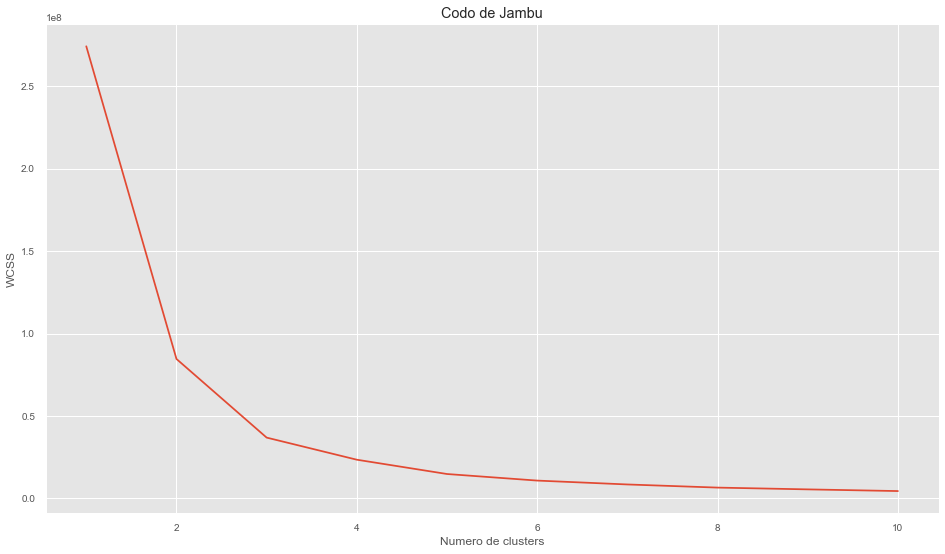

In [121]:
plt.plot(range(1,11),wcss)
plt.title("Codo de Jambu")
plt.xlabel("Numero de clusters")
plt.ylabel("WCSS")#WSCSS. indicar similitud dentro de los clusters
plt.show()

In [122]:
clustering = KMeans(n_clusters = 3,max_iter = 300)#Crear el modelo
clustering.fit(dataset)#Aplicar el modelo al dataset

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [123]:
dataset['KMeans_clusters'] = clustering.labels_ #Los resultados del clustering se guardan en labels_ dentro del modelo
dataset

,Edad,GENERO,ESTADO_CIVIL,NUMERO_HIJOS,NIVEL_ESTUDIO,SERVICIO,TIEMPO_PROPIETARIO,Edad Licencia,CILINDRAJE,Min(Recorrido (Km)),...,Mean(Uso Zona (Min)),Mean(Fuera Zona (Min)),Mean(Colision),MARCA,CLASE,MODELO,SINIESTROS_2016,SINIESTROS_2017,SINIESTROS_2018,KMeans_clusters
0,72.38,2,1,4,5,1,5,55.18,2300,1,...,21.20,0.00,0.00,13,1,1987,0,0,0,1
1,35.93,2,1,0,4,1,7,9.15,1300,1,...,0.00,28.09,0.00,17,1,1992,0,0,0,0
2,81.04,1,1,3,5,1,10,61.55,2500,1,...,7.66,13.36,0.00,13,1,1998,0,0,0,1
3,38.46,1,5,0,1,2,5,11.10,2500,0,...,21.31,1.34,0.01,3,1,2003,0,0,0,1
4,70.30,2,1,0,5,1,6,37.19,2000,1,...,7.47,15.15,0.00,12,1,2003,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
597,56.09,1,1,2,5,1,4,13.85,1200,0,...,19.59,2.97,0.01,17,1,2006,0,1,0,0
598,48.42,1,3,0,5,1,9,25.42,2000,1,...,14.31,3.59,0.00,12,1,1999,0,0,1,1
599,46.10,1,3,1,5,1,2,7.65,1300,1,...,22.91,0.13,0.00,12,1,2002,0,0,0,0
600,53.38,1,5,4,1,1,2,25.44,2500,0,...,0.05,11.92,0.01,17,1,2007,0,1,0,1


In [124]:
#Analisis de componenetes principales(reduce la cantidad de variables a visualizar)
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
pca_dataset = pca.fit_transform(dataset)
pca_dataset_df = pd.DataFrame(data = pca_dataset, columns = ['Componente_1','Componente_2','Componente_3'])
pca_nom_data = pd.concat([pca_dataset_df, dataset[['KMeans_clusters']]], axis=1)

pca_nom_data

,Componente_1,Componente_2,Componente_3,KMeans_clusters
0,291.379554,124.012295,4.119183,1
1,-709.019098,2.196478,-11.593733,0
2,491.284835,94.966531,12.428814,1
3,490.974336,-31.777944,-12.320515,1
4,-8.965403,-29.352968,12.728946,1
...,...,...,...,...
597,-809.003196,-19.359158,-9.636129,0
598,-8.975108,-8.213342,-19.827214,1
599,-708.727177,107.272474,12.842012,0
600,491.247073,99.250036,4.454545,1


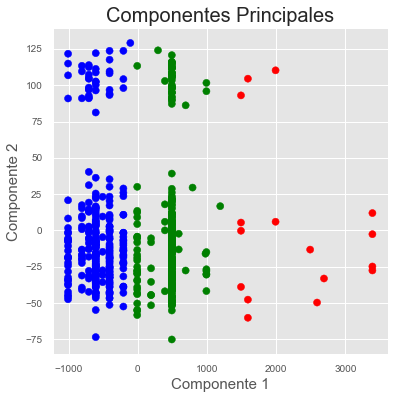

In [127]:
fig = plt.figure(figsize = (6,6))

ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Componente 1', fontsize = 15)
ax.set_ylabel('Componente 2', fontsize = 15)
ax.set_title('Componentes Principales', fontsize = 20)

color_theme = np.array(["blue","green","red"])
ax.scatter(x = pca_nom_data.Componente_1, y = pca_nom_data.Componente_2, c = color_theme[pca_nom_data.KMeans_clusters], s = 50)
plt.show()